(876, 876)


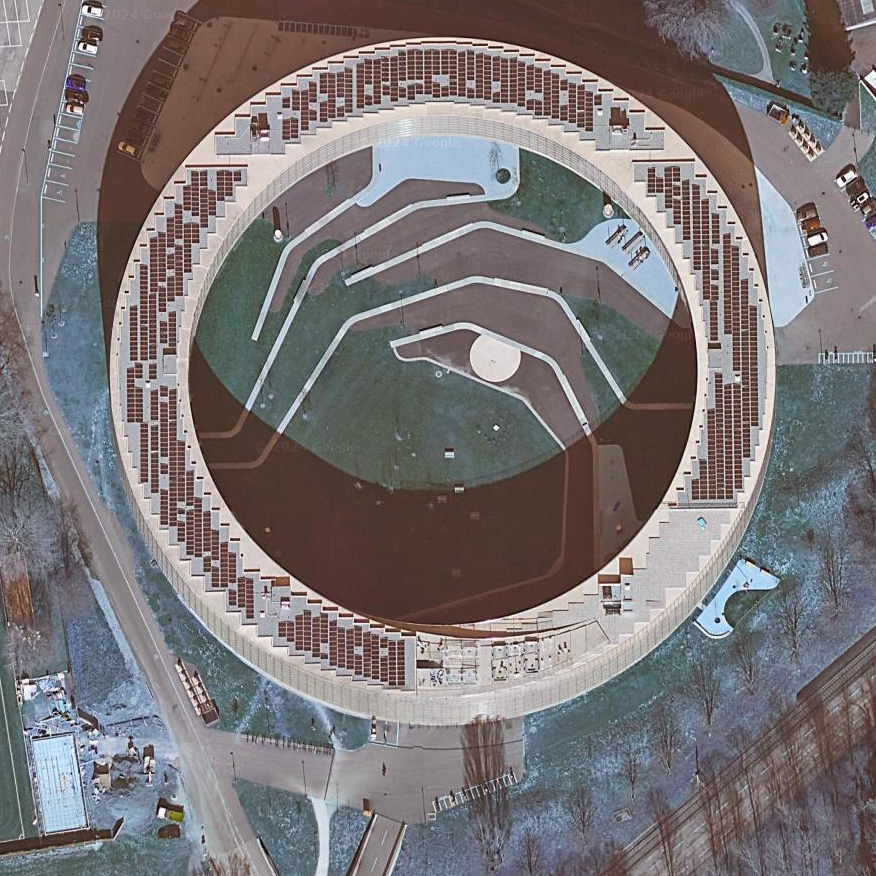

In [1]:
%load_ext autoreload
%autoreload 2
import os
import json
import re
import cv2
from PIL import Image
from datetime import datetime

from sat_down.image_downloading import download_image


default_prefs = {
    'url': 'https://mt.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    'tile_size': 256,
    'channels': 3,
    # 'dir': os.path.join(file_dir, 'all_tiles'),
    'headers': {
        'cache-control': 'max-age=0',
        'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="99", "Google Chrome";v="99"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'none',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.82 Safari/537.36'
    },
    # 'tl': '',
    # 'br': '',
    # 'zoom': ''
}
# scale in m/pix
zoom_to_scale = {
    1: 78271.52,
    2: 39135.76,
    3: 19567.88,
    4: 9783.94,
    5: 4891.97,
    6: 2445.98,
    7: 1222.99,
    8: 611.5,
    9: 305.75,
    10: 152.87,
    11: 76.44,
    12: 38.22,
    13: 19.11,
    14: 9.55,
    15: 4.78,
    16: 2.39,
    17: 1.19,
    18: 0.6,
    19: 0.3
}




def take_input(messages):
    inputs = []
    print('Enter "r" to reset or "q" to exit.')
    for message in messages:
        inp = input(message)
        if inp == 'q' or inp == 'Q':
            return None
        if inp == 'r' or inp == 'R':
            return take_input(messages)
        inputs.append(inp)
    return inputs


def fetch_image(top_left, bottom_right, zoom):
    prefs = default_prefs.copy()

    lat1, lon1 = top_left
    lat2, lon2 = bottom_right

    if zoom not in zoom_to_scale:
        raise ValueError('Invalid zoom level ' + zoom) 


    lat1, lon1 = top_left
    lat2, lon2 = bottom_right

    channels = int(prefs['channels'])
    tile_size = int(prefs['tile_size'])
    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)

    img = download_image(lat1, lon1, lat2, lon2, zoom, prefs['url'],
        prefs['headers'], tile_size, channels)

    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    name = f'img_{timestamp}.png'
    return Image.fromarray(img)

vortex_tl = (46.525163, 6.574005)

from math import radians, degrees, sin, cos, atan2, sqrt
def calculate_new_coordinates(lat_lon, meters_south, meters_east):
    R = 6378137
    lat, lon = map(radians, lat_lon)
    new_lat = lat - meters_south / R
    new_lon = lon + meters_east / (R * cos(lat))
    return (degrees(new_lat), degrees(new_lon))

img = fetch_image(vortex_tl, calculate_new_coordinates(vortex_tl, 180, 180), 19)
print(img.size)
def image_scale(zoom, loc):
    lat, _ = loc
    return zoom_to_scale[zoom] * cos(radians(lat))
image_scale(19, vortex_tl) * img.size[0]
img


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(-400.75016685558995, -161.13862996606895)


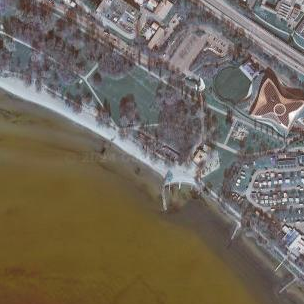

In [2]:
%load_ext autoreload
%autoreload 2
from location import Location
location = Location("Lausanne", vortex_tl, (46.513842815059405, 6.608259947302791), 16, 500)
location.get_middle_tile()


AttributeError: 'Location' object has no attribute 'fetch_and_save'

In [ ]:

all_tiles = list(location.tiles.values())
len(all_tiles)
print(location.tiles.keys())

dict_keys([(46.5206714235794, 6.587060686446906), (46.5206714235794, 6.593588259825724), (46.5206714235794, 6.600115833204542), (46.5206714235794, 6.606643406583361), (46.5206714235794, 6.613170979962179), (46.5161798471588, 6.587060146886971), (46.5161798471588, 6.593587180705855), (46.5161798471588, 6.60011421452474), (46.5161798471588, 6.6066412483436245), (46.5161798471588, 6.613168282162509)])


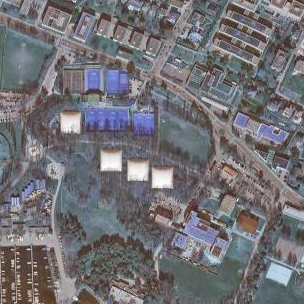

In [ ]:
all_tiles[8]

(-400.75016685558995, -161.13862996606895)
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


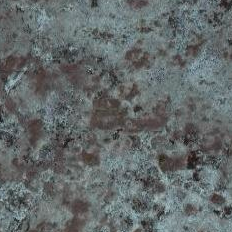

In [4]:

%load_ext autoreload
%autoreload 2
from location import Location
everglade = Location("Everglade safari", (25.755795526935334, -80.61820307107125), (25.663827094353394, -80.52808682489453), 16, 500)
everglade.get_middle_tile()

In [5]:
everglade.fetch(14)

In [6]:
len(everglade.tiles)

360

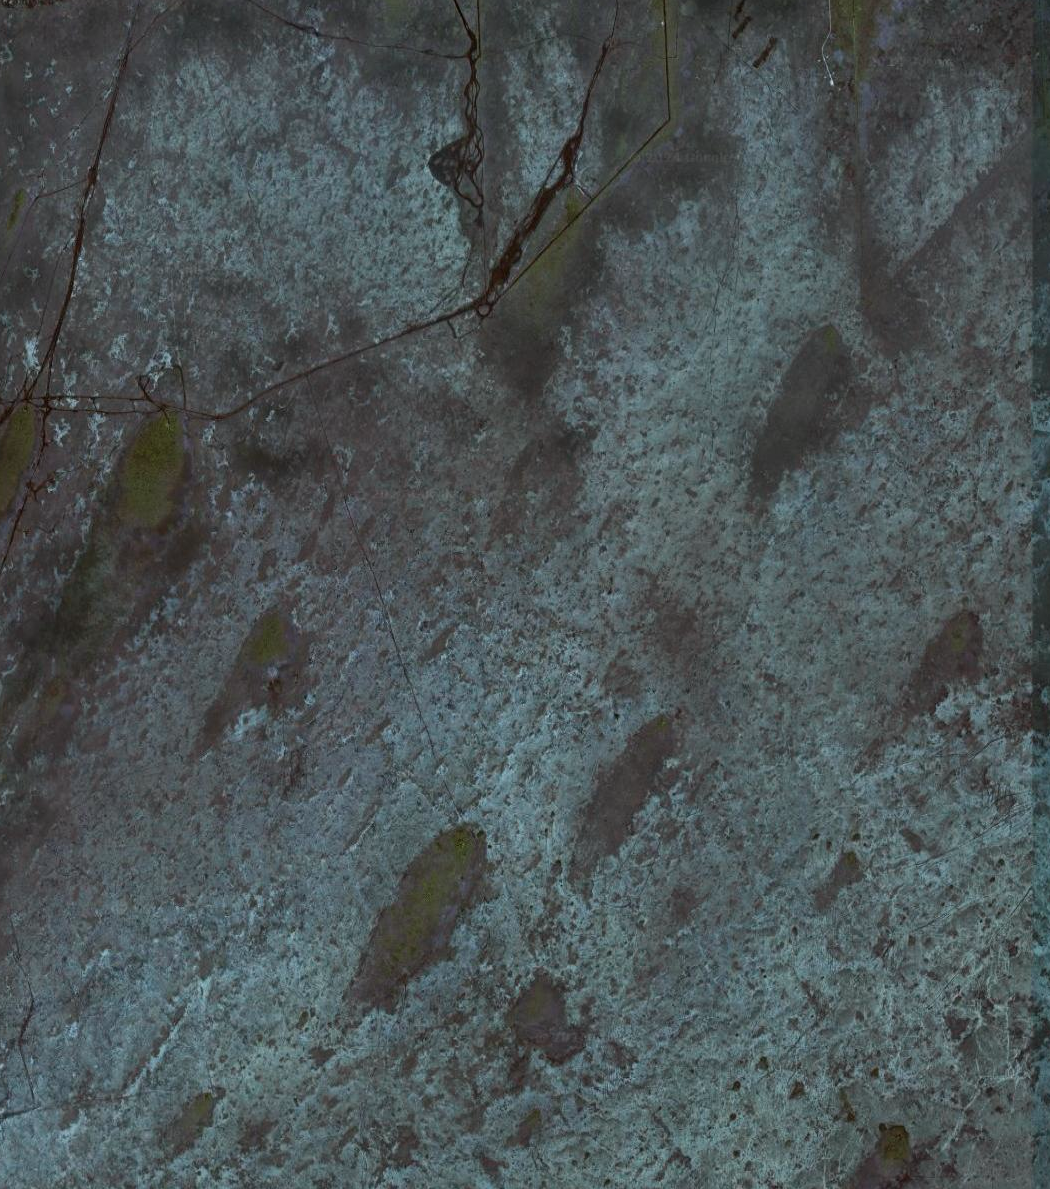

In [7]:
everglade.fetch_thumbnail(zoom=14)
everglade.thumbnail

In [8]:
everglade.get_real_size()

(-10237.879084077034, 9038.584439390232)

In [17]:
everglade.save_class()

In [20]:
ev2 = Location.load_class("Everglade safari")

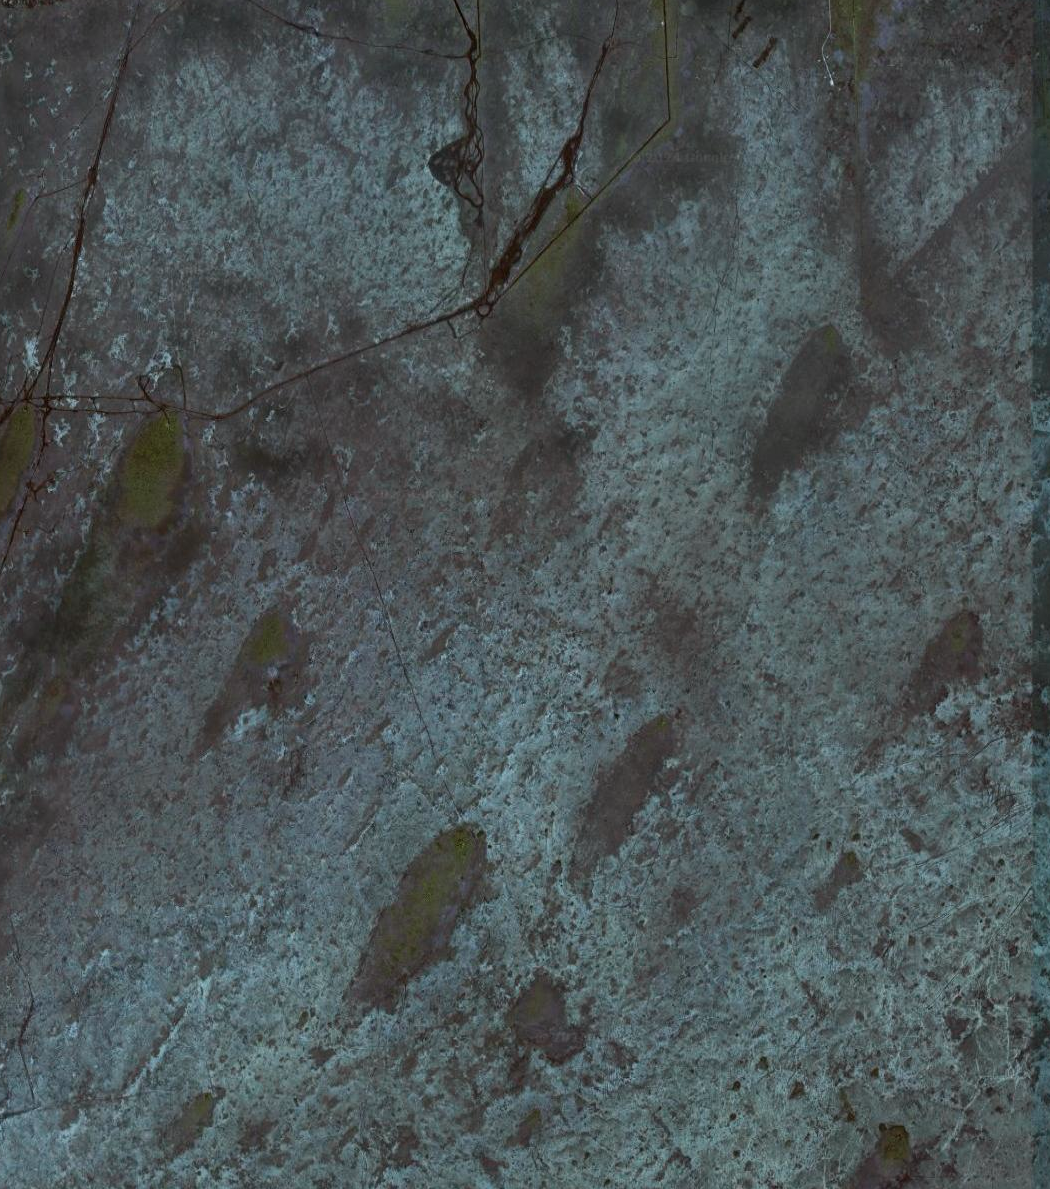

In [21]:
ev2.thumbnail

In [14]:
len(ev2.tiles)

720